In [22]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tell Python to look in the root folder for 'src'
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import your custom engine!
from src.model_selector import AutoModelSelector

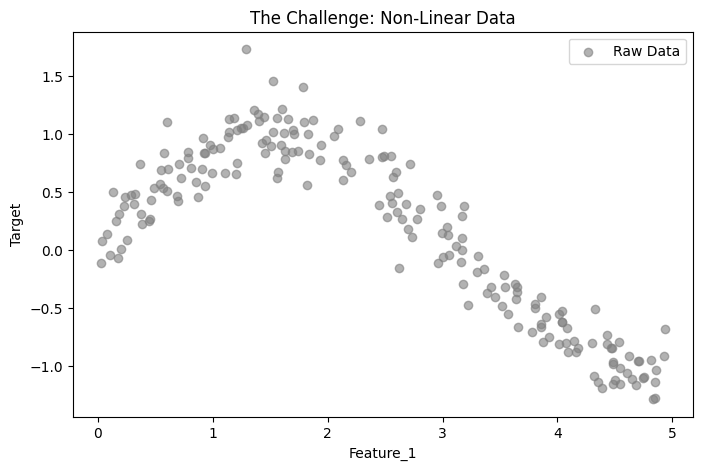

In [23]:
# 1. Generate a curved relationship: y = sin(x) + some random noise
np.random.seed(42)
X_raw = np.sort(5 * np.random.rand(200, 1), axis=0)
y_raw = np.sin(X_raw).ravel() + np.random.normal(0, 0.2, X_raw.shape[0])

# 2. Put it into a Pandas DataFrame (like a real CSV would be)
X = pd.DataFrame(X_raw, columns=['Feature_1'])
y = pd.Series(y_raw, name='Target')

# 3. Plot the raw data
plt.figure(figsize=(8, 5))
plt.scatter(X['Feature_1'], y, color='gray', alpha=0.6, label='Raw Data')
plt.title("The Challenge: Non-Linear Data")
plt.xlabel("Feature_1")
plt.ylabel("Target")
plt.legend()
plt.show()


In [24]:
print("Initializing the Brain...")
# We use neg_mean_squared_error. Remember, closer to 0 is better!
automl = AutoModelSelector(n_trials=100, scoring='neg_mean_squared_error')

# Start the tournament
automl.fit(X, y)

[I 2026-02-18 19:49:23,933] A new study created in memory with name: no-name-05d44b58-8d0d-46c8-b3d7-6bb0b37d34ae
[I 2026-02-18 19:49:24,041] Trial 0 finished with value: -0.8251427889522018 and parameters: {'num_strategy': 'median', 'use_scaler': True, 'use_poly': True, 'degree': 4, 'use_log': True, 'use_pca': True, 'pca_components': 0.786775026673683, 'model_type': 'rf', 'rf_n_estimators': 90, 'rf_max_depth': 19}. Best is trial 0 with value: -0.8251427889522018.
[I 2026-02-18 19:49:24,086] Trial 1 finished with value: -0.1465750468374789 and parameters: {'num_strategy': 'mean', 'use_scaler': True, 'use_poly': True, 'degree': 4, 'use_log': True, 'use_pca': True, 'pca_components': 0.9094807495791988, 'model_type': 'xgb', 'xgb_n_estimators': 83, 'xgb_max_depth': 7, 'xgb_lr': 0.04461888245637387}. Best is trial 1 with value: -0.1465750468374789.


Initializing the Brain...
Starting AutoML Search for 100 trials...


[I 2026-02-18 19:49:24,153] Trial 2 finished with value: -0.17217790488449752 and parameters: {'num_strategy': 'mean', 'use_scaler': False, 'use_poly': False, 'use_log': True, 'use_pca': False, 'model_type': 'xgb', 'xgb_n_estimators': 294, 'xgb_max_depth': 8, 'xgb_lr': 0.14158853396245796}. Best is trial 1 with value: -0.1465750468374789.
[I 2026-02-18 19:49:24,311] Trial 3 finished with value: -0.10578482483745437 and parameters: {'num_strategy': 'mean', 'use_scaler': True, 'use_poly': True, 'degree': 4, 'use_log': False, 'use_pca': False, 'model_type': 'rf', 'rf_n_estimators': 184, 'rf_max_depth': 14}. Best is trial 3 with value: -0.10578482483745437.
[I 2026-02-18 19:49:24,480] Trial 4 finished with value: -0.10196954887672119 and parameters: {'num_strategy': 'median', 'use_scaler': False, 'use_poly': True, 'degree': 4, 'use_log': False, 'use_pca': True, 'pca_components': 0.8974991879042922, 'model_type': 'rf', 'rf_n_estimators': 206, 'rf_max_depth': 11}. Best is trial 4 with value:


BEST TRIAL FOUND:
{'num_strategy': 'mean', 'use_scaler': True, 'use_poly': True, 'degree': 3, 'use_log': True, 'use_pca': True, 'pca_components': 0.9882319381824493, 'model_type': 'rf', 'rf_n_estimators': 148, 'rf_max_depth': 14}

Skipping Log Transform: Data contains negative values.
Final Pipeline Retrained and Ready.


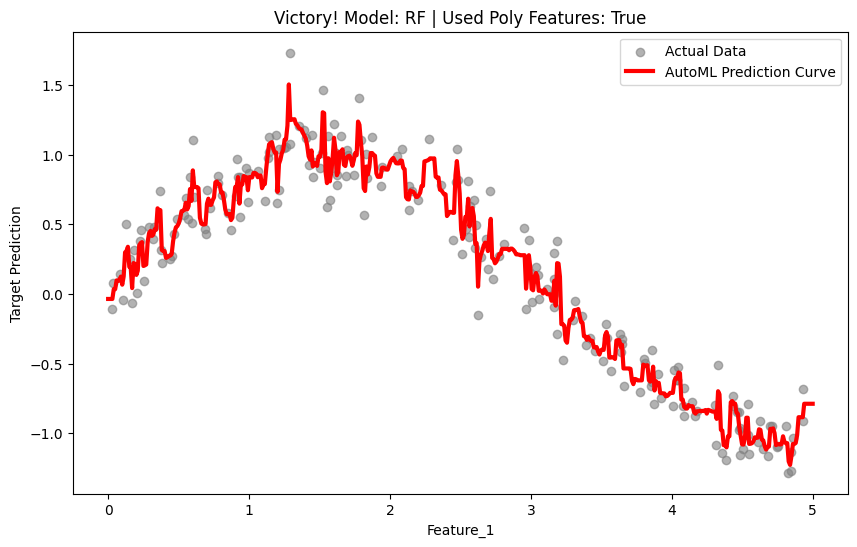

In [25]:
# 1. Create a smooth line of test points from 0 to 5
X_test = pd.DataFrame(np.linspace(0, 5, 500), columns=['Feature_1'])

# 2. Ask your pipeline to predict the target for these points
y_pred = automl.predict(X_test)

# 3. Plot the results!
plt.figure(figsize=(10, 6))
plt.scatter(X['Feature_1'], y, color='gray', alpha=0.6, label='Actual Data')
plt.plot(X_test['Feature_1'], y_pred, color='red', linewidth=3, label='AutoML Prediction Curve')

# Grab the best params to put in the title
best_algo = automl.study.best_params.get('model_type', 'Unknown')
used_poly = automl.study.best_params.get('use_poly', False)

plt.title(f"Victory! Model: {best_algo.upper()} | Used Poly Features: {used_poly}")
plt.xlabel("Feature_1")
plt.ylabel("Target Prediction")
plt.legend()
plt.show()